# Рынок заведений общественного питания Москвы

## Содержание
1. [Описание проекта](#describe)

    1.1 [Цель](#purpose)


2. [Загрузка и подготовка данных](#download)

    2.1 [Описание данных](#data)
    
    2.2 [Загрузка данных](#tables)


3. [Анализ данных](#analiz)

   3.1. [Соотношение видов объектов общественного питания по количеству](#typetosum)
   
      * [Выводы](#result1)

   3.2. [Соотношение сетевых и несетевых заведений по количеству.](#chain)
   
      * [Выводы](#result2)

   3.3. [Посадочные места в сетевых заведениях](#place)
   
      * [Выводы](#result3)

   3.4. [Расположение объектов](#location)
   
      * [Выводы](#result4)


4. [Выводы и рекомендации](#results)


5. [Презентация](#report)

## Описание проекта
<a id="describe"></a>
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### Цель
<a id="purpose"></a>
Наша цель: исследовать рынок общественного питания. Для достижения поставленной цели необходимо выполнить следующие задачи:
 - Подготовить данные к анализу.
 
 - Проанализировать данные:
     - соотношение видов объектов общественного питания по количеству,
     - соотношение сетевых и несетевых заведений по количеству,
     - виды объектов общественного питания, для которых характерно сетевое распространение,
     - характерные черты сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
     
 - Описать для каждого вида объекта общественного питания среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?
 
 - Выделить в отдельный столбец информацию об улице из столбца address.
 
 - Определить топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?
 
 - Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?
 
 - Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
 
- Подготовить презентацию.

<a id="download"></a>
## Загрузка и подготовка данных


<a id="data"></a>
### Описание данных

Таблица rest_data:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.
 
### Загрузка данных
<a id="tables"></a>
Загрузим таблицу. Первый взгляд на данные.

In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from numpy import median
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import re
from io import BytesIO
import requests


In [2]:
pd.set_option('max_colwidth', 400)
path = 'C:\\Users\plea\OneDrive\Документы\Практикум\Проекты для гитхаб\Общепит'
data_rest = pd.read_csv(path + '/rest_data.csv')
data_rest.head(15)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


In [3]:
data_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
data_rest['object_name'].nunique()

10393

In [5]:
data_rest['object_name'].unique()

array(['СМЕТАНА', 'Родник', 'Кафе «Академия»', ..., 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

In [6]:
data_rest['chain'].unique()

array(['нет', 'да'], dtype=object)

In [7]:
data_rest['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [8]:
data_rest['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [9]:
data_rest.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [10]:
data_rest['id'].nunique()

15366

In [11]:
data_rest['address'].nunique()

9108

В целом данные корректные: пропусков, отрицательных и некорректных значений нет. ID не повторяются. Типы данных соответствуют содержимому.

In [12]:
data_rest['object_name'] = data_rest['object_name'].str.lower()

Перед тем как перейдём к анализу, загрузим таблицу streets, которая понадобится нам в дальнейшем, когда мы будем рассмативать расположение объектов. В таблице содержатся улицы и районы Москвы.

In [13]:
spreadsheet_id = '1bN97muXxi-w0bVR0bo2Uh9AqSVYvKoQ1uc00nVACneE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.head()

,streetname,areaid,area
0,Выставочный переулок,17,Пресненский район
1,улица Гашека,17,Пресненский район
2,Большая Никитская улица,17,Пресненский район
3,Глубокий переулок,17,Пресненский район
4,Большой Гнездниковский переулок,17,Пресненский район


Заменим названия столбцов streetname и areaid, проверим на пропуски.

In [14]:
streets.columns = ['street_name', 'area_id', 'area']
streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  4398 non-null   object
 1   area_id      4398 non-null   int64 
 2   area         4398 non-null   object
dtypes: int64(1), object(2)
memory usage: 103.2+ KB


Пропусков нет, данные корректны.

## Анализ данных
<a id="analiz"></a>
### Соотношение видов объектов общественного питания по количеству.
<a id="typetosum"></a>



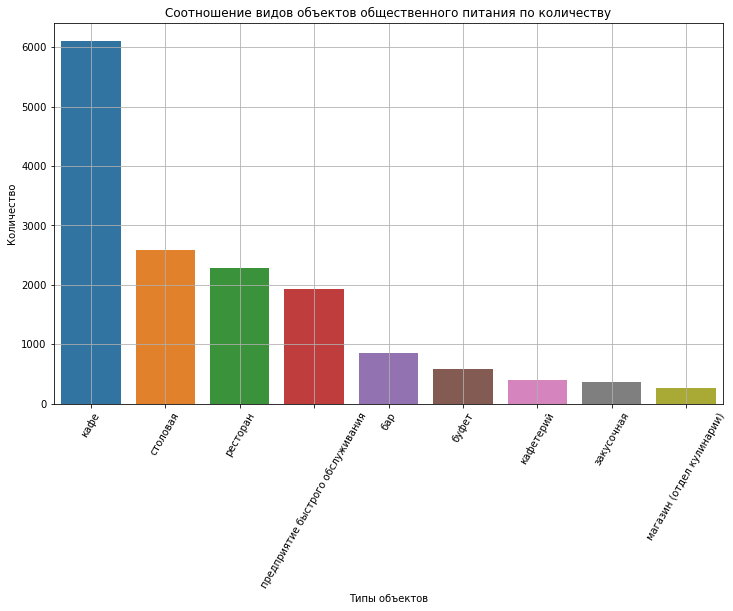

In [15]:
# Сгруппируем данные по типу объекта и посчитаем количество объектов
data_object_type = data_rest.groupby('object_type')['id'].count().reset_index()
data_object_type.columns = ['object_type', 'id']
# Отсортируем по убыванию и построим график
data_object_type.sort_values(by='id', ascending=False, inplace=True)
plt.figure(figsize=(12, 7))
sns.barplot(x='object_type', y='id', data=data_object_type)
sns.set_palette('pastel') 
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xlabel("Типы объектов")
plt.ylabel("Количество")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

Больше всего распространены кафе. Следом с отрывом более чем в два раза идут столовые, ненамного отстают рестораны и предприятия быстрого обслуживания, завершают пятерку лидеров бары. Посчитаем долю объектов питания от общего количества.

In [16]:
data_object_type['ratio'] = (data_object_type['id'] / (data_object_type['id'].sum())).round(4) * 100
data_object_type.sort_values(by='ratio', ascending=False)

,object_type,id,ratio
3,кафе,6099,39.69
8,столовая,2587,16.84
7,ресторан,2285,14.87
6,предприятие быстрого обслуживания,1923,12.51
0,бар,856,5.57
1,буфет,585,3.81
4,кафетерий,398,2.59
2,закусочная,360,2.34
5,магазин (отдел кулинарии),273,1.78


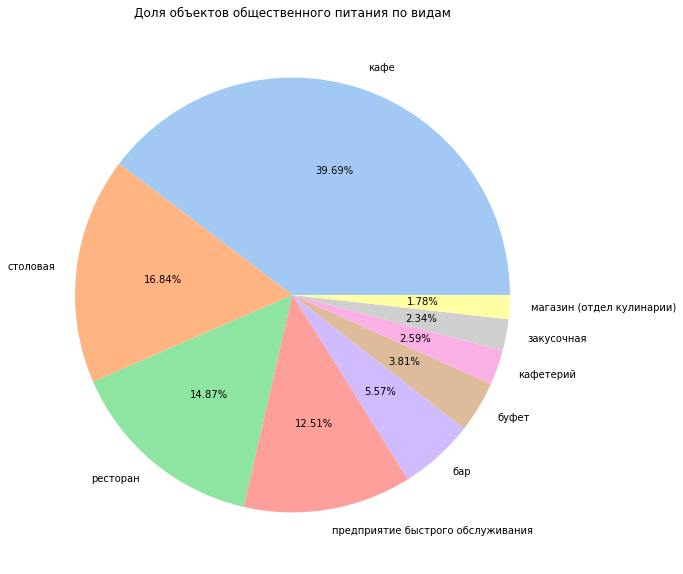

In [17]:
# Для наглядности построим круговую диаграмму
plt.figure(figsize=(10, 10))
plt.pie(data=data_object_type, x='ratio', labels='object_type', autopct='%1.2f%%')
sns.set_palette('pastel') 
plt.title('Доля объектов общественного питания по видам')
plt.show()


Почти 40% составляют кафе, а столовые почти 17%, на долю отделов кулинарии приходится меньше 2%.

#### Выводы
<a id="result1"></a>

Больше всего распространены кафе: они составляют 40% от общего количества пунктов общественного питания. Менее распространены столовые, которые составляют 17%, ненамного отстают рестораны и предприятия быстрого обслуживания, составляющие 15% и 12% соответственно, завершают пятерку лидеров бары, доля которых составляет 5,5%.

### Соотношение сетевых и несетевых заведений по количеству.
<a id="chain"></a>

Построим график соотношения количества сетевых и несетевых заведений.
Для какого вида объекта общественного питания характерно сетевое распространение?


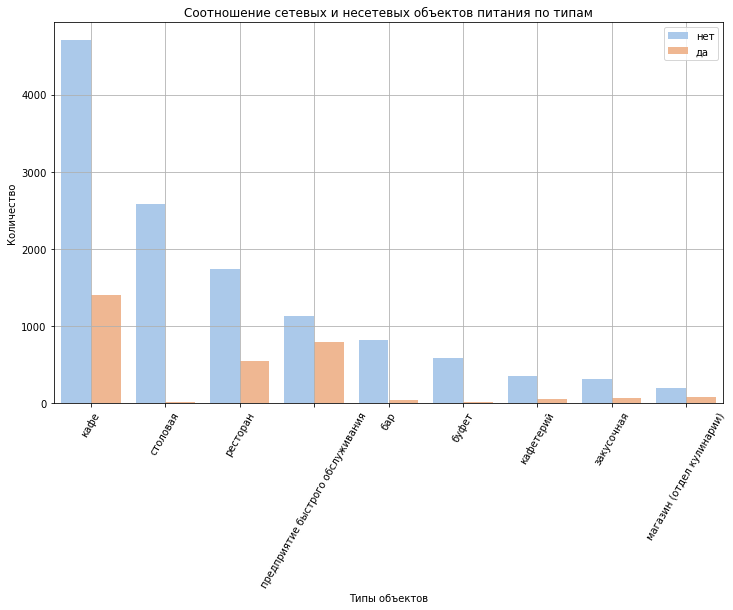

In [18]:
# Сгруппируем данные по объекту и по отношению к сети
chain = data_rest.groupby(['object_type', 'chain'])['id'].count().reset_index()
chain.columns = ['object_type', 'chain', 'object_count']
# Отсортируем по убыванию и построим график
chain.sort_values(by='object_count', ascending=False, inplace=True)
plt.figure(figsize=(12, 7))
sns.barplot(x='object_type', y='object_count', data=chain, hue='chain')
sns.set_palette('pastel') 
plt.title('Соотношение сетевых и несетевых объектов питания по типам')
plt.xlabel("Типы объектов")
plt.ylabel("Количество")
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.show()

Несетевых заведений больше. Сетевых столовых, баров и буфетов мало. Сетевых больше всего кафе, предприятий сетевого обслуживания и ресторанов. Чтобы определить для какого типа заведений характерно сетевое распространение, посмотрим процентное отношение сетевых заведений к несетевым по типам.

In [19]:
# Трансформируем немного таблицу и посчитаем отношение сетевых к несетевым, а также долю от общего числа.
chain_t = chain.query('chain == "да"')
chain_f = chain.query('chain == "нет"')
chain_m = chain_t.merge(chain_f, on=['object_type'])
chain_m['object_sum'] = chain_m['object_count_x'] + chain_m['object_count_y']
chain_m['ratio_yes'] = (chain_m['object_count_x'] / chain_m['object_sum']).round(3) * 100
chain_m.sort_values(by='ratio_yes', ascending=False, inplace=True)
chain_m

,object_type,chain_x,object_count_x,chain_y,object_count_y,object_sum,ratio_yes
1,предприятие быстрого обслуживания,да,791,нет,1132,1923,41.1
3,магазин (отдел кулинарии),да,78,нет,195,273,28.6
2,ресторан,да,544,нет,1741,2285,23.8
0,кафе,да,1396,нет,4703,6099,22.9
4,закусочная,да,56,нет,304,360,15.6
5,кафетерий,да,52,нет,346,398,13.1
6,бар,да,37,нет,819,856,4.3
7,буфет,да,11,нет,574,585,1.9
8,столовая,да,3,нет,2584,2587,0.1


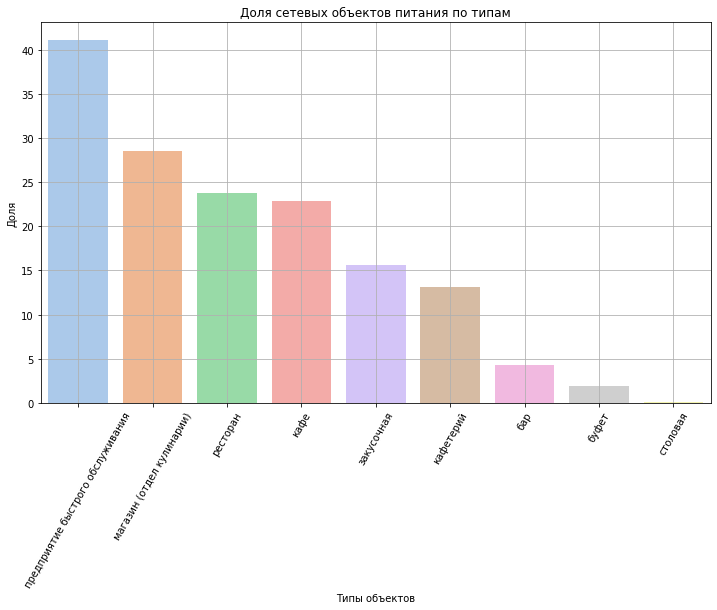

In [20]:
# Построим график
plt.figure(figsize=(12, 7))
sns.barplot(x='object_type', y='ratio_yes', data=chain_m)
sns.set_palette('pastel') 
plt.title('Доля сетевых объектов питания по типам')
plt.xlabel("Типы объектов")
plt.ylabel("Доля")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

Сетевое распространение более характерно для предприятий быстрого питания, далее идут отделы кулинарии в магазинах и только потом рестораны, кафе и закусочные. Сетевых столовых почти нет - 0.1%. 


#### Выводы
<a id="result2"></a>

Несетевых заведений больше, чем сетевых. Сетевых столовых, баров и буфетов мало. По количеству сетевых больше всего кафе (за счёт большого количества кафе в целом), предприятий сетевого обслуживания и ресторанов.
Сетевое распространение более характерно для предприятий быстрого питания: 41,1% от общего количества предприятий, далее идут отделы кулинарии в магазинах (28,6%) и только потом рестораны, кафе и закусочные. Сетевых столовых почти нет - 0.1%. 



### Посадочные места в сетевых заведениях
<a id="place"></a>
Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для каждого вида объекта общественного питания рассмотрим распределение количества посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики. Для начала посмотрим какой процент заведений работает без посадочных мест.

In [21]:
data_rest_chain = data_rest.query('chain == "да"')
data_rest_chait_wihtout = ((data_rest_chain.loc[data_rest_chain['number'] == 0]).count() / 
                           data_rest_chain['number'].count()) * 100
data_rest_chait_wihtout['number'].round(2)

9.03

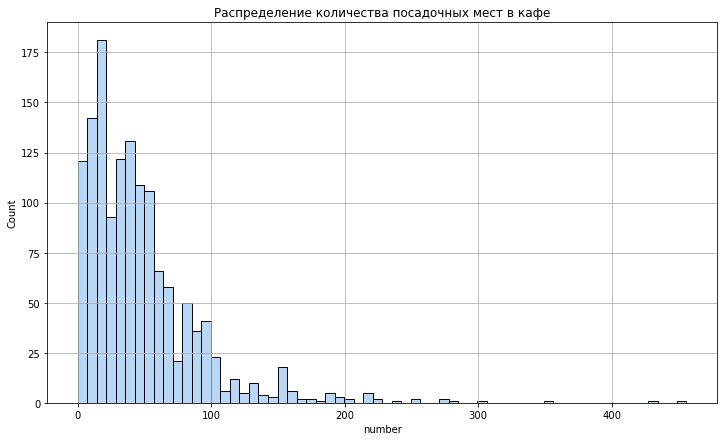

In [22]:

plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "кафе"')['number'])
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в кафе')
plt.grid(True)
plt.show()

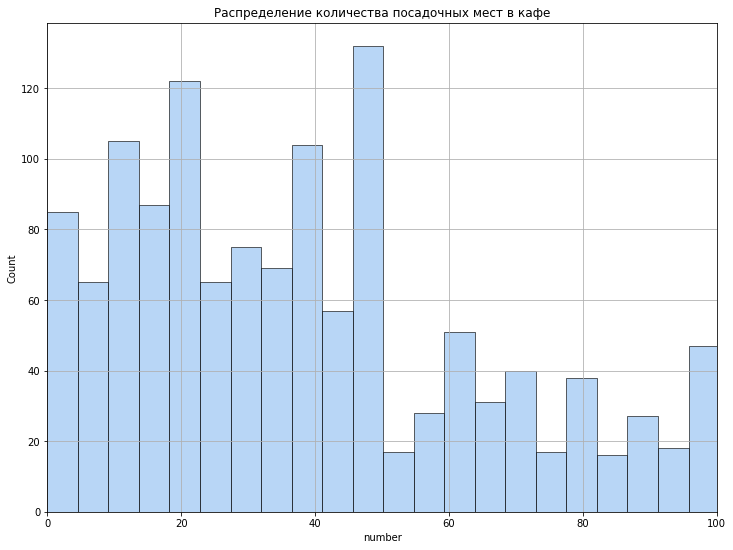

In [23]:
plt.figure(figsize=(12, 9))
sns.histplot(data_rest_chain.query('object_type == "кафе"')['number'], bins=100)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в кафе')
plt.grid(True)
plt.xlim([0, 100])
plt.show()

Количество мест в кафе весьма разнообразно. Есть уникальные кафе, в которых посадочных мест более 100. Но их немного, основные значения лежат в диапозоне от нуля до 50.

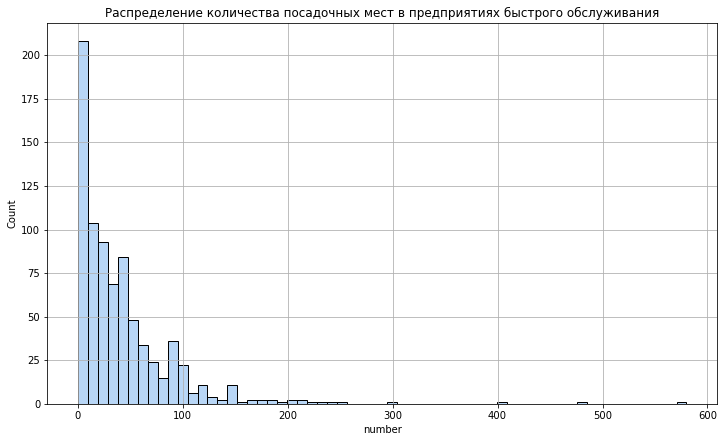

In [24]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "предприятие быстрого обслуживания"')['number'])
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в предприятиях быстрого обслуживания')
plt.grid(True)
plt.show()

В предприятиях быстрого обслуживания большинство заведений не имеет посадочных мест. По заведениям, имеющим посадочные места, график похож на график по посадочным местам в кафе: более 100 мало, в основном менее 50.

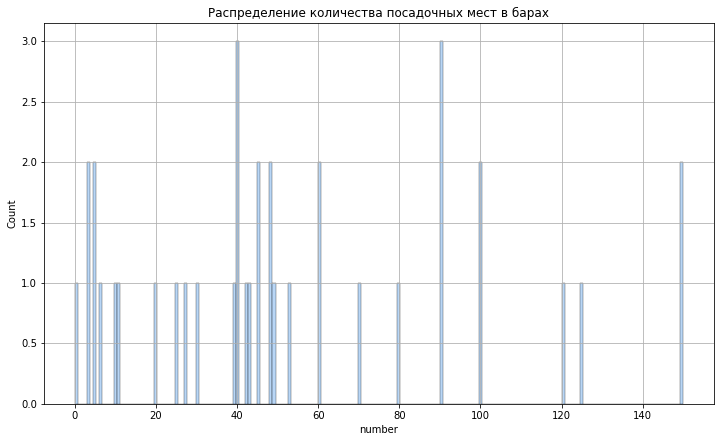

In [25]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "бар"')['number'], bins=200)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в барах')
plt.grid(True)
plt.show()

Весьма интересное распределение посадочных мест в барах. Больше всего баров, в которых 40 или 90 посадочных мест, далее идут бары, в которых посадочных мест 3-5, 45-60, около 100 и 150.

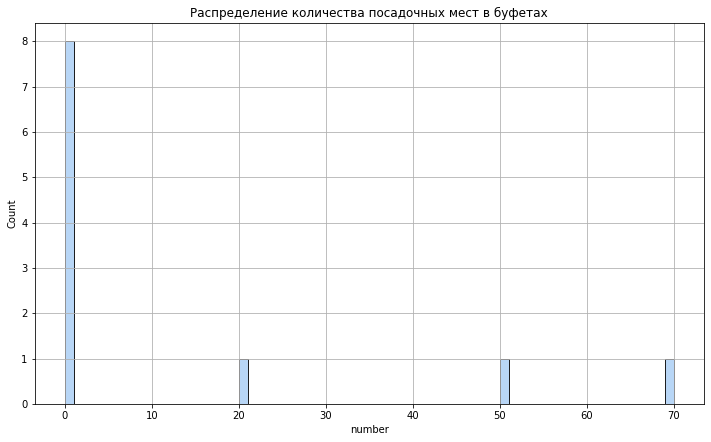

In [26]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "буфет"')['number'], bins=70)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в буфетах')
plt.grid(True)
plt.show()

In [27]:
data_rest_chain.query('object_type == "буфет"')

,id,object_name,chain,object_type,address,number
1054,138535,кофе с собой,да,буфет,"город Москва, Большая Серпуховская улица, дом 31, корпус 10",0
2046,138842,кофе с собой,да,буфет,"город Москва, Новокузнецкая улица, дом 39",0
6089,23888,теремок,да,буфет,"город Москва, улица Миклухо-Маклая, дом 32А",20
7006,157300,азбука вкуса,да,буфет,"город Москва, проезд Аэропорта, дом 8",0
9970,171198,хлеб насущный,да,буфет,"город Москва, Климентовский переулок, дом 9/1",50
11968,181328,крошка картошка,да,буфет,"город Москва, Боровское шоссе, дом 6",0
12956,200711,милти,да,буфет,"город Москва, Профсоюзная улица, дом 118",0
15089,215716,суп кафе,да,буфет,"город Москва, Скаковая улица, дом 17, строение 2",70
15176,217037,кофе с собой,да,буфет,"город Москва, Ярцевская улица, дом 25А",0
15203,216666,теремок,да,буфет,"город Москва, Солнцевский проспект, дом 21",0


В большинстве буфетов посадочных мест нет. Поскольку сетевых буфетов немного, сделать вывод о количестве посадочных мест в сетевых буфетах мы не можем.

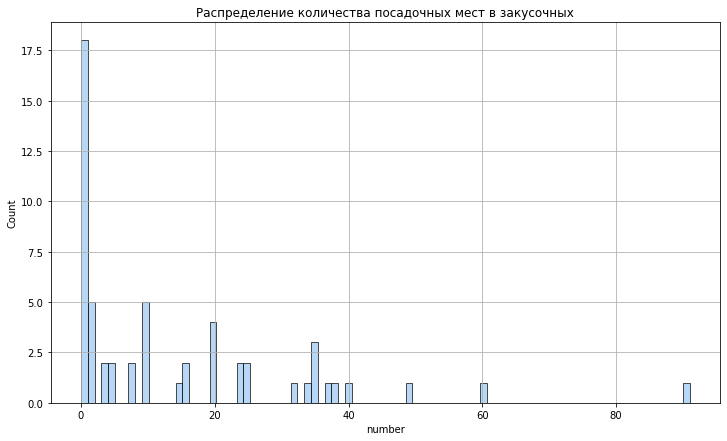

In [28]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "закусочная"')['number'], bins=90)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в закусочных')
plt.grid(True)
plt.show()

Большинство закусочных тоже без посадочных мест. Есть уникальные закусочные с посадочными местами в количестве 50, 60 и 90.

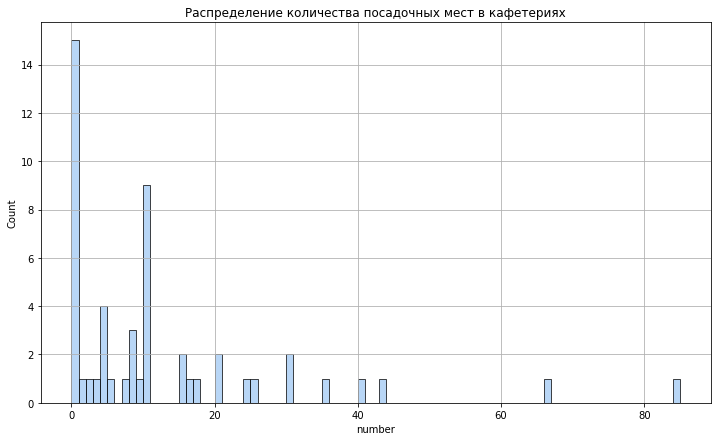

In [29]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "кафетерий"')['number'], bins=85)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в кафетериях')
plt.grid(True)
plt.show()

Похожая ситуация в кафетериях: большинство не имеет посадочных мест, далее выделяются кафетерии с 10 посадочными местами. Есть уникальные кафетерии с количеством посадочных мест от 20 до 85.

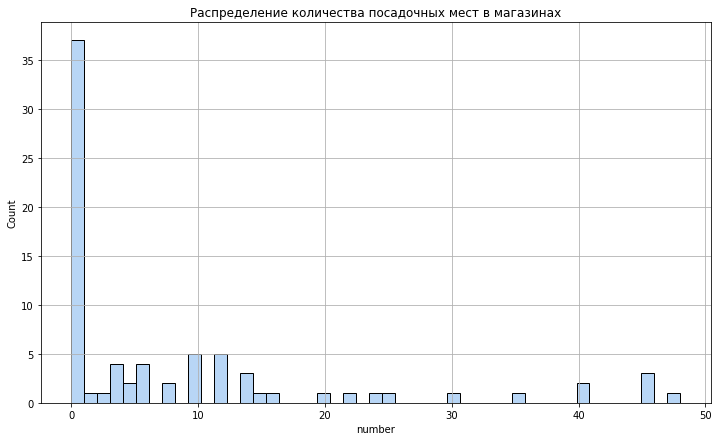

In [30]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "магазин (отдел кулинарии)"')['number'], bins=47)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в магазинах')
plt.grid(True)
plt.show()

В отделах кулинарии в магазинах посадочные места бывают редко. Если есть, то чаще 10-12.

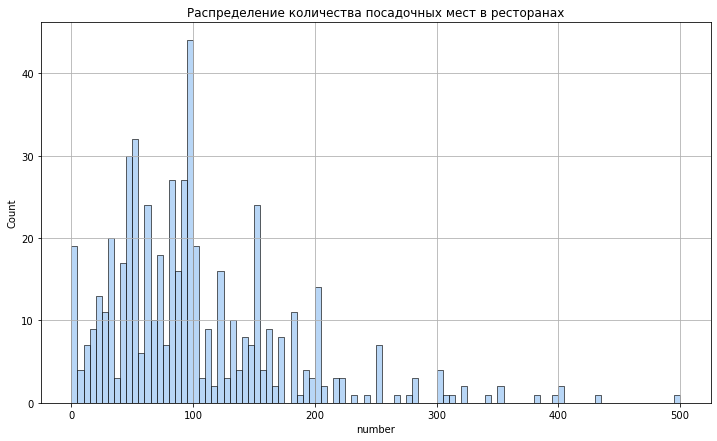

In [31]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_chain.query('object_type == "ресторан"')['number'], bins=100)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в ресторанах')
plt.grid(True)
plt.show()

Большинство ресторанов имеют около 100 посадочных мест. Больше ста редко, но есть выброс около 150. Также редко меньше 20, но есть выброс в районе нуля.

In [32]:
data_rest_chain.query('object_type == "столовая"')

,id,object_name,chain,object_type,address,number
5234,20979,грабли,да,столовая,"город Москва, Ярославское шоссе, дом 26, корпус 1",120
5967,104941,му-му,да,столовая,"город Москва, Люблинская улица, дом 169, корпус 2",55
6574,78347,гурман,да,столовая,"город Москва, Оршанская улица, дом 3",162


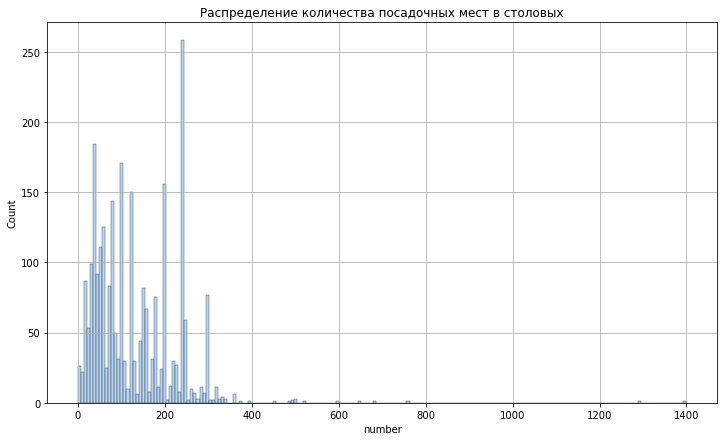

In [33]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest.query('object_type == "столовая"')['number'], bins=200)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в столовых')
plt.grid(True)
plt.show()

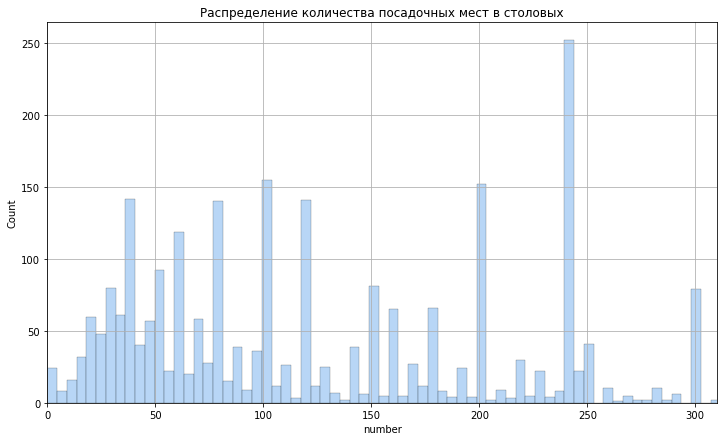

In [34]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest.query('object_type == "столовая"')['number'], bins=310)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест в столовых')
plt.grid(True)
plt.xlim([0, 310])
plt.show()

Сложно судить о количестве мест в сетевых столовых, поскольку их всего 3. Столовые редко бывают сетевыми. По несетевым столовым количество посадочных мест колеблется от 30 до 300.


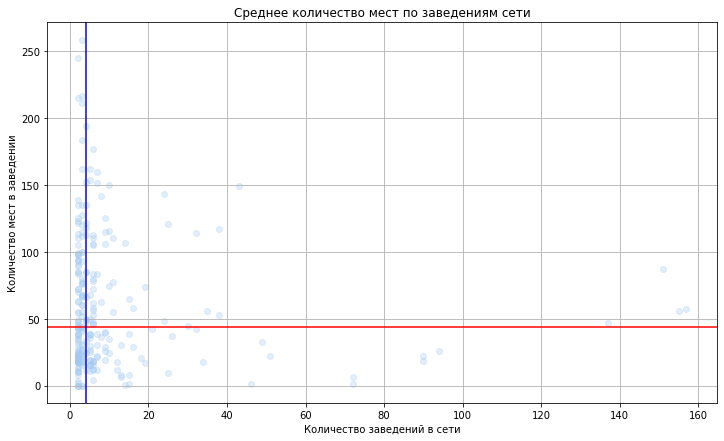

In [35]:
data_rest_chain_on = data_rest_chain.groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index()
data_rest_chain_on.columns=['object_name', 'object_number', 'places_number']
data_rest_chain_moreone = data_rest_chain_on.query('object_number > 1')

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel('Количество заведений в сети')
ax.set_ylabel('Количество мест в заведении')
ax.set_title('Среднее количество мест по заведениям сети')
plt.scatter(data_rest_chain_moreone['object_number'], data_rest_chain_moreone['places_number'], alpha=0.3)
line_y = data_rest_chain_moreone['places_number'].median()
line_x = data_rest_chain_moreone['object_number'].median()
plt.axhline(y = line_y, color='red', linestyle='-')
plt.axvline(x = line_x, color='blue', linestyle='-')
plt.grid(True)  

plt.show()

Сказать об однозначной зависимости среднего числа посадочных мест от количества заведений в сети нельзя.

In [36]:
print(data_rest_chain_moreone['places_number'].corr(data_rest_chain_moreone['object_number']))

-0.06919396493666934


Коэфициент корреляции показывает, что зависимость слабая и обратная.

In [37]:
(data_rest_chain_moreone.loc[(data_rest_chain_moreone['places_number'] > data_rest_chain_moreone[
    'places_number'].median()) & (data_rest_chain_moreone['object_number'] > data_rest_chain_moreone[
    'object_number'].median())]).count()

object_name      51
object_number    51
places_number    51
dtype: int64

In [38]:
(data_rest_chain_moreone.loc[(data_rest_chain_moreone['places_number'] > data_rest_chain_moreone[
    'places_number'].median()) & (data_rest_chain_moreone['object_number'] < data_rest_chain_moreone[
    'object_number'].median())]).count()

object_name      59
object_number    59
places_number    59
dtype: int64

In [39]:
(data_rest_chain_moreone.loc[(data_rest_chain_moreone['places_number'] < data_rest_chain_moreone[
    'places_number'].median()) & (data_rest_chain_moreone['object_number'] > data_rest_chain_moreone[
    'object_number'].median())]).count()

object_name      58
object_number    58
places_number    58
dtype: int64

In [40]:
(data_rest_chain_moreone.loc[(data_rest_chain_moreone['places_number'] < data_rest_chain_moreone[
    'places_number'].median()) & (data_rest_chain_moreone['object_number'] < data_rest_chain_moreone[
    'object_number'].median())]).count()

object_name      61
object_number    61
places_number    61
dtype: int64

Больше всего сетей с небольшим количеством заведений и небольшим средним количеством посадочных мест. Чуть меньше заведений с большим количеством мест и небольшим количеством заведений. Заведений с небольшим количеством мест и большим количеством заведений ещё меньше. Меньше всего заведений, имеющих много посадочных мест и много заведений в сети.

#### Выводы
<a id="result3"></a>

Про кафе можно однозначно сказать: заведения отличаются относительно небольшими размерами и большим разнообразием. 
В предприятиях быстрого обслуживания большинство заведений не имеет посадочных мест. По заведениям имеющим посадочные места график похож на график по посадочным местам в кафе: до 50. Бары отличаются типовым количеством посадочных мест. Больше всего баров, в которых 40 или 90 посадочных мест, далее идут бары, в которых посадочных мест 3-5, 45-60, около 100 и 150. Сложно сделать однозначные выводы про посадочные места в буфетах и столовых: сетевых буфетов с посадочными местами и сетевых столовых всего по три. В большинстве сетевых буфетов посадочных мест нет.
Большинство закусочных и кафетериев тоже без посадочных мест. Есть уникальные закусочные с посадочными местами в количестве 50, 60 и 90. Выделяются кафетерии с 10 посадочными местами. Есть уникальные кафетерии с количеством посадочных мест от 20 до 85.
В отделах кулинарии в магазинах посадочные места бывают редко. Если есть, то чаще 10-12.
Большинство ресторанов имеют около 100 посадочных мест. Больше ста редко, но есть выброс около 150. Также редко меньше 20, но есть выброс в районе нуля.


### Расположение заведений
<a id="location"></a>

Выделим в отдельный столбец информацию об улице из столбца address.
Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией (таблица streets) и ответим на вопрос — в каких районах Москвы находятся эти улицы?
Найдём число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?
Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [41]:
data_rest['address'].unique()

array(['город Москва, улица Егора Абакумова, дом 9',
       'город Москва, улица Талалихина, дом 2/1, корпус 1',
       'город Москва, Абельмановская улица, дом 6', ...,
       'город Москва, Салтыковская улица, дом 7Г',
       'город Москва, Осенний бульвар, дом 9',
       'город Москва, улица Новый Арбат, дом 13'], dtype=object)

In [42]:
# С помощью регулярных выражений выделим улицу из адреса
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'просек',
         'поселение', 'микрорайон', 'квартал', 'километр', 'территория']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*(?:$|,))".format("|".join(words))

data_rest['street'] = data_rest['address'].str.extract(str_pat, flags=re.I)
data_rest['street'].isnull().sum()

197

Мы выделили улицу из адреса. В тех случаях, когда улицы нет, вместо неё выделили название территории, например, микрорайоны, километр МКАД. Город Зеленоград, не имеющий в адресах названий улиц, выделять не будем. За счёт отсутствия улиц он попадает в топ и рассматривать его как отдельную улицу не корректно. Помешать пропуски нам не должны, поэтому удалять не будем. Выделим топ-10 улиц по количеству объектов.

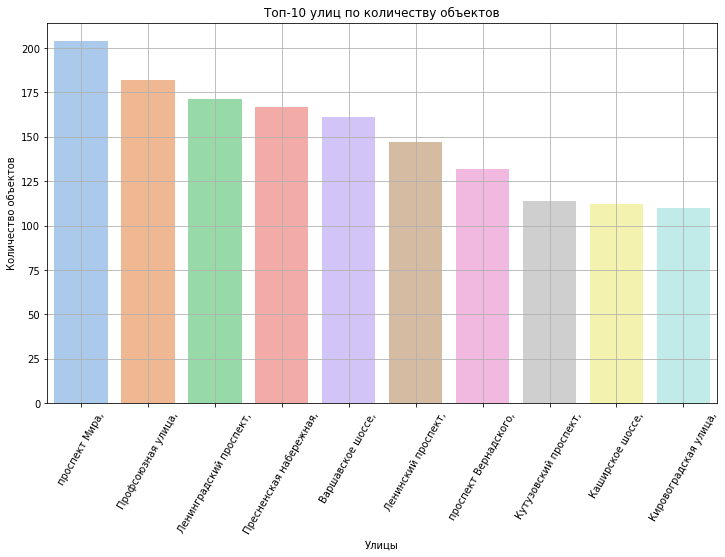

In [43]:
# Сгруппируем данные по улице и посчитаем количество заведений на улице
data_rest_street = data_rest.groupby('street')['id'].count().sort_values(ascending=False)
# Отсортируем по убыванию и построим график топ-10 улиц.
data_rest_street_top = data_rest_street.head(10).reset_index()
data_rest_street_top.columns = ['street_name', 'count']
plt.figure(figsize=(12, 7))
sns.barplot(x='street_name', y='count', data=data_rest_street_top)
sns.set_palette('pastel') 
plt.title('Топ-10 улиц по количеству объектов')
plt.xlabel("Улицы")
plt.ylabel("Количество объектов")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

Самая богатая на заведения общественного питания улица - проспект Мира.

In [44]:
# Сгруппируем по улице таблицу streets, соберём названия районов, через которые проходят улицы.
streets_gr = streets.groupby("street_name").agg(list).reset_index()
def areas(area):
    areas = ", ".join(map(str,area))
    return areas
streets_gr['area_id'] = streets_gr['area_id'].apply(areas)
streets_gr['area'] = streets_gr['area'].apply(areas)
streets_gr

,street_name,area_id,area
0,1-й Автозаводский проезд,98,Даниловский район
1,1-й Амбулаторный проезд,54,Район Аэропорт
2,1-й Архивный переулок,20,Район Хамовники
3,1-й Бабьегородский переулок,21,Район Якиманка
4,1-й Балтийский переулок,54,Район Аэропорт
...,...,...,...
3599,улица Юности,"23, 52","Район Вешняки, Район Матушкино-Савелки"
3600,улица Юных Ленинцев,"113, 121","Район Кузьминки, Район Текстильщики"
3601,улица Яблочкова,74,Бутырский район
3602,шоссе Фрезер,117,Нижегородский район


In [45]:
# Посмотрим через какие районы проходят улицы из топ-10.
street_top = data_rest_street.head(10).reset_index()
street_top_list = street_top['street']
street_top_area = streets_gr.query('street_name in @street_top_list')
street_top_area

,street_name,area_id,area


За исключением Кривоградской улицы, Кутузовского проспекта и Пресненской набережной, улицы проходят через несколько районов. Протяжённость этих улиц, за исключением Пресненской набережной, от 4 до 15 км. И располагаются они либо в центре (Пресненская набережная и Кировоградская улица), либо проходят от центра к окраинам.

In [46]:
# Выведем топ-10 улиц
data_rest_street = data_rest_street.reset_index()
data_rest_street.columns = ['street_name', 'count']
data_rest_street.head(10)

,street_name,count
0,"проспект Мира,",204
1,"Профсоюзная улица,",182
2,"Ленинградский проспект,",171
3,"Пресненская набережная,",167
4,"Варшавское шоссе,",161
5,"Ленинский проспект,",147
6,"проспект Вернадского,",132
7,"Кутузовский проспект,",114
8,"Каширское шоссе,",112
9,"Кировоградская улица,",110


In [47]:
# Посмотрим на улицы, где по одному заведению
data_rest_street_one = data_rest_street.query('count == 1')
street_one_list = data_rest_street_one['street_name']
street_one_area = streets_gr.query('street_name in @street_one_list')
street_one_area

,street_name,area_id,area


521 улица, на которой по одному заведению. Либо улицы короткие, либо расположены неудачно, либо рядом есть крупные улицы, на которых много конкурентов. Посмотрим в каких районах расположены эти улицы. Посчитаем количество таких улиц по районам.

In [48]:
street_one_area.groupby('area')['street_name'].count().sort_values(ascending=False).head(20)

Series([], Name: street_name, dtype: int64)

В основном районы, в которых много улиц, на которых только 1 объект общественного питания, относятся к Центральному административному округу Москвы. Как в любом историческом центре крупного города: улочки не большие.
Чем меньше таких улиц, тем дальше от центра. Что тоже объяснимо: улицы больше, длиннее, аренда ниже, заведений на отдельно взятой улице больше. Посмотрим как обстоят дела с посадочными местами в заведениях на улицах из топ-10.

In [49]:
data_rest_top = data_rest.query('street in @street_top_list')
data_rest_top

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,"Варшавское шоссе,"
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,"Варшавское шоссе,"
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,"Варшавское шоссе,"
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,"Варшавское шоссе,"
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,"Варшавское шоссе,"
...,...,...,...,...,...,...,...
15308,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,"Пресненская набережная,"
15325,198436,милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,"Ленинградский проспект,"
15347,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,"Профсоюзная улица,"
15350,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,"Каширское шоссе,"


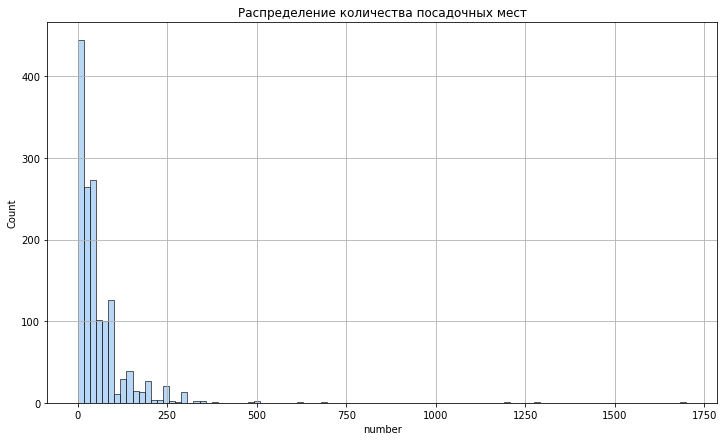

In [50]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_top['number'], bins=100)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест')
plt.grid(True)
plt.show()

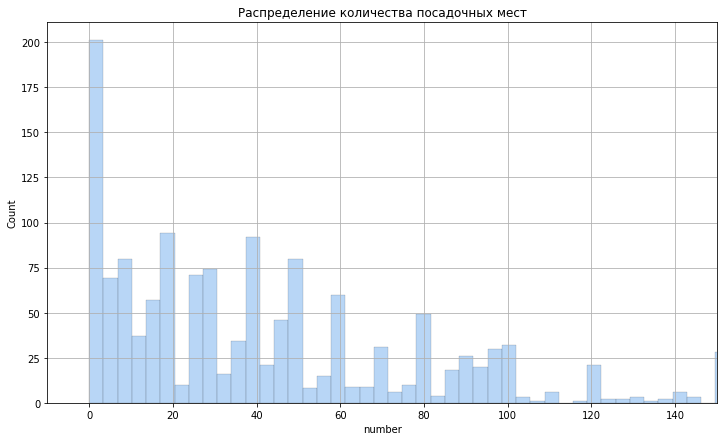

In [51]:
plt.figure(figsize=(12, 7))
sns.histplot(data_rest_top['number'], bins=500)
sns.set_palette('pastel') 
plt.title('Распределение количества посадочных мест')
plt.grid(True)
plt.xlim([-10, 150])
plt.show()

Есть выделяющееся значение в районе нуля: многие заведения работают без посадочных мест. Есть уникальные заведения, где посадочных мест более 1000. Скорее всего, столовая на промышленном предприятии. Чаще всего встерчаются заведения с 20 и 40 посадочными местами, чуть реже с 10, 30, 50, 60, 80. Больше 80 редко. Есть значения от 80 до 120, но их немного. Можно сделать вывод, что на топовых улицах заведений много, но чаще они небольшие. Посмотрим долю объектов по типам.

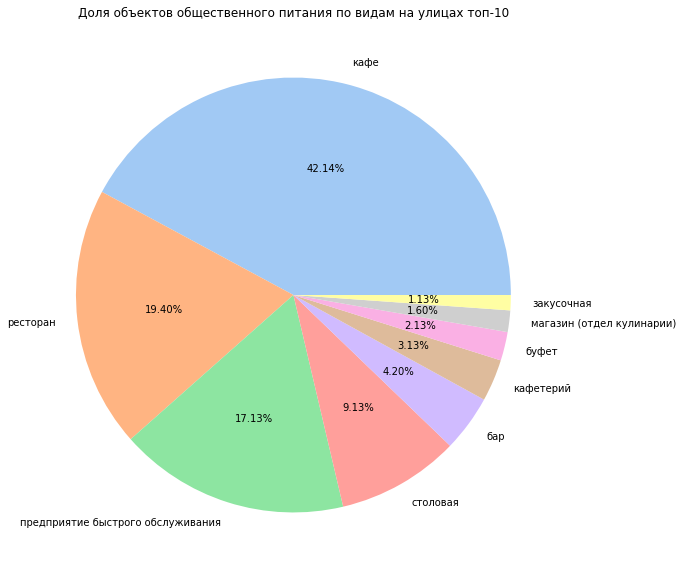

In [52]:
# Сгруппируем по типу объекта и посчитаем количество заведений
data_rest_top_type = data_rest_top.groupby('object_type')['id'].count().reset_index()
data_rest_top_type.columns=['object_type', 'count']
data_rest_top_type.sort_values(by='count', ascending=False, inplace=True)
data_rest_top_type['ratio'] = ((data_rest_top_type['count'] / data_rest_top_type['count'].sum()) * 100).round(2)
# Для наглядности построим круговую диаграмму
plt.figure(figsize=(10, 10))
plt.pie(data=data_rest_top_type, x='ratio', labels='object_type', autopct='%1.2f%%')
sns.set_palette('pastel') 
plt.title('Доля объектов общественного питания по видам на улицах топ-10')
plt.show()

Кафе, рестораны и предприятия быстрого обслуживания в большинстве. Что косвенно подтверждает выводы, сделанные по предыдущему графику: в кафе обычно до 50 мест, в ресторанах около ста, а предприятия быстрого обслуживания стараются работать без посадочных мест, но если они есть, то до 50. По сравнению с распределением долей по всему городу, доли кафе, ресторанов и предприятий быстрого обслуживания по топовым улицам больше, чем по всему городу, а доля столовых значительно меньше: почти 17% по городу и 9% по топ-10. Доли остальных объектов изменились незначительно.

#### Выводы
<a id="result4"></a>

Мы рассмотрели топ-10 улиц. Больше всего заведений общественного питания на проспекте Мира. За исключением Кривоградской улицы, Кутузовского проспекта и Пресненской набережной, улицы проходят через несколько районов. Протяжённость этих улиц, за исключением Пресненской набережной, от 4 до 15 км. И располагаются они либо в центре (Пресненская набережная и Кировоградская улица), либо проходят от центра к окраинам. Улицы, на которых по одному заведению, чаще всего расположены в центральных районах города.
Количество посадочных мест в заведениях, расположенных на топовых улицах, колеблется от 0 до 80, значений от 80 до 120 немного, а более 120 - редкие. Из этого можно сделать вывод, что эти заведения небольшого размера, но их много. Даже рестораны, в которых чаще всего около 100 мест, на топовых улицах имеют около 80, а доля их в общем количестве больше, чем доля в общем количестве по городу.


## Выводы и рекомендации
<a id="results"></a>

Наше исследование показало, что в Москве чаще всего встречаются кафе, значительно реже столовые, рестораны и предприятия быстрого обслуживания. На долю остальных объектов приходится всего 16%. Несетевых объектов гораздо больше, чем сетевых. Исключение составляют предприятия быстрого обслуживания, 40% которых - сетевые заведения. 
9% сетевых заведений не имеют посадочных мест. В кафе и предприятиях быстрого питания обычно до 50 мест, в ресторанах около ста, в барах 40 или 90. Сетевых столовых и буфетов очень мало. Кафетерии, закусочные и кулинарные отделы в магазинах посадочные места имеют редко и если есть, то немного.
Больше всего сетей с небольшим количеством заведений и небольшим средним количеством посадочных мест. Чуть меньше заведений с большим количеством мест и небольшим количеством заведений. Заведений с небольшим количеством мест и большим количеством заведений ещё меньше. Меньше всего заведений, имеющих много посадочных мест и много заведений в сети.
Исследование топ-10 улиц показало, что больше всего заведений общественного питания на больших, протяжённых улицах, а также на крупных улицах центральных районов. Такие заведения отличаются небольшим для своего типа количеством посадочных мест. Среди них больше всего кафе, ресторанов и предприятий быстрого обслуживания, столовых значительно меньше, чем по городу в целом. На небольших улочках чаще располагается одно заведение общественного питания. И большинство таких улочек находится в центральных районах.
Из этого можно сделать вывод, что с одной стороны кафе пользуются спросом, с другой стороны высока конкуренция. С точки зрения развития сети стоит обратить внимание на предприятия быстрого обслуживания.
Для принятия более конкретного решения необходимо продолжить исследование и рассмотреть различия в арендной плате (стоимости недвижимости) по районам, особенности районов (спальные, промышленные, густота населения, конкурентные предприятия), расположение конкурентных предприятий по типам, а также обратить внимание на самих роботов: возможности, техническое обслуживание, ремонтопригодность.

## Презентация
<a id="report"></a>


https://disk.yandex.ru/i/W_Hrd6QqYAwOyg